In [429]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [431]:
df=pd.read_csv("swiggy.csv")
df.head()


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

Corrections:

Age column should be numerical.                         
Ratings should be float.                               
Date and time columns should be date and time.                              
Vehicle conditions seems to be categorical column which is integer encoded.                      
Multiple deliveries should be integer column.                          
Target column should also be numbers.                            

In [436]:
df.sample(50)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
5683,0xdb93,KOCRES06DEL03,22,4.8,9.982834,76.283268,10.072834,76.373268,16-02-2022,19:30:00,19:40:00,conditions Sunny,Jam,2,Buffet,motorcycle,1,No,Urban,(min) 24
13789,0x48c2,CHENRES20DEL02,30,4,12.975996,80.221898,13.025996,80.271898,30-03-2022,21:30:00,21:40:00,conditions Stormy,Jam,1,Drinks,scooter,0,No,Metropolitian,(min) 32
12307,0x666b,MYSRES04DEL03,21,4.8,12.308500,76.665808,12.338500,76.695808,19-03-2022,21:25:00,21:35:00,conditions Stormy,Jam,2,Drinks,scooter,1,No,Metropolitian,(min) 27
15277,0xabd6,MYSRES14DEL01,31,4.4,0.000000,0.000000,0.070000,0.070000,16-03-2022,19:35:00,19:45:00,conditions Sandstorms,Jam,2,Snack,electric_scooter,2,No,Metropolitian,(min) 34
8229,0x9a5f,MYSRES02DEL03,28,4.8,12.304569,76.643622,12.334569,76.673622,30-03-2022,20:00:00,20:05:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian,(min) 24
32373,0x5096,HYDRES010DEL03,37,4.8,17.428294,78.404423,17.488294,78.464423,28-03-2022,21:35:00,21:45:00,conditions Stormy,Jam,0,Meal,motorcycle,2,No,Metropolitian,(min) 43
5938,0xc5e6,ALHRES16DEL01,21,4.9,25.450377,81.834236,25.520377,81.904236,14-02-2022,21:30:00,21:45:00,conditions Cloudy,Jam,0,Meal,motorcycle,1,No,Metropolitian,(min) 35
42664,0x6669,SURRES06DEL02,22,4.8,21.185047,72.808590,21.235047,72.858590,28-03-2022,20:20:00,20:25:00,conditions Fog,Jam,1,Drinks,scooter,1,No,Metropolitian,(min) 32
27440,0x6c50,RANCHIRES18DEL01,28,4.6,23.351489,85.324253,23.421489,85.394253,02-04-2022,18:00:00,18:15:00,conditions Fog,Medium,0,Buffet,motorcycle,1,Yes,Metropolitian,(min) 43
8999,0xda19,KOLRES19DEL02,31,4.8,22.549100,88.400467,22.599100,88.450467,13-02-2022,22:15:00,22:20:00,conditions Windy,Low,1,Snack,motorcycle,1,No,Metropolitian,(min) 29


In [438]:
(df == "NaN ").sum().sum()


8515

In [440]:
# replace string NaN with NaN()

df.replace("NaN ",np.NaN)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [442]:
# df with all the missing values replace

missing_df = (
    df.replace("NaN ",np.NaN)
    .assign(
        Weatherconditions = lambda df_ : (
            df_['Weatherconditions']
            .str.replace("conditions ","")
            .replace("NaN",np.NaN)
            )
    )
)

In [444]:
missing_df.isna().sum()


ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

<Axes: >

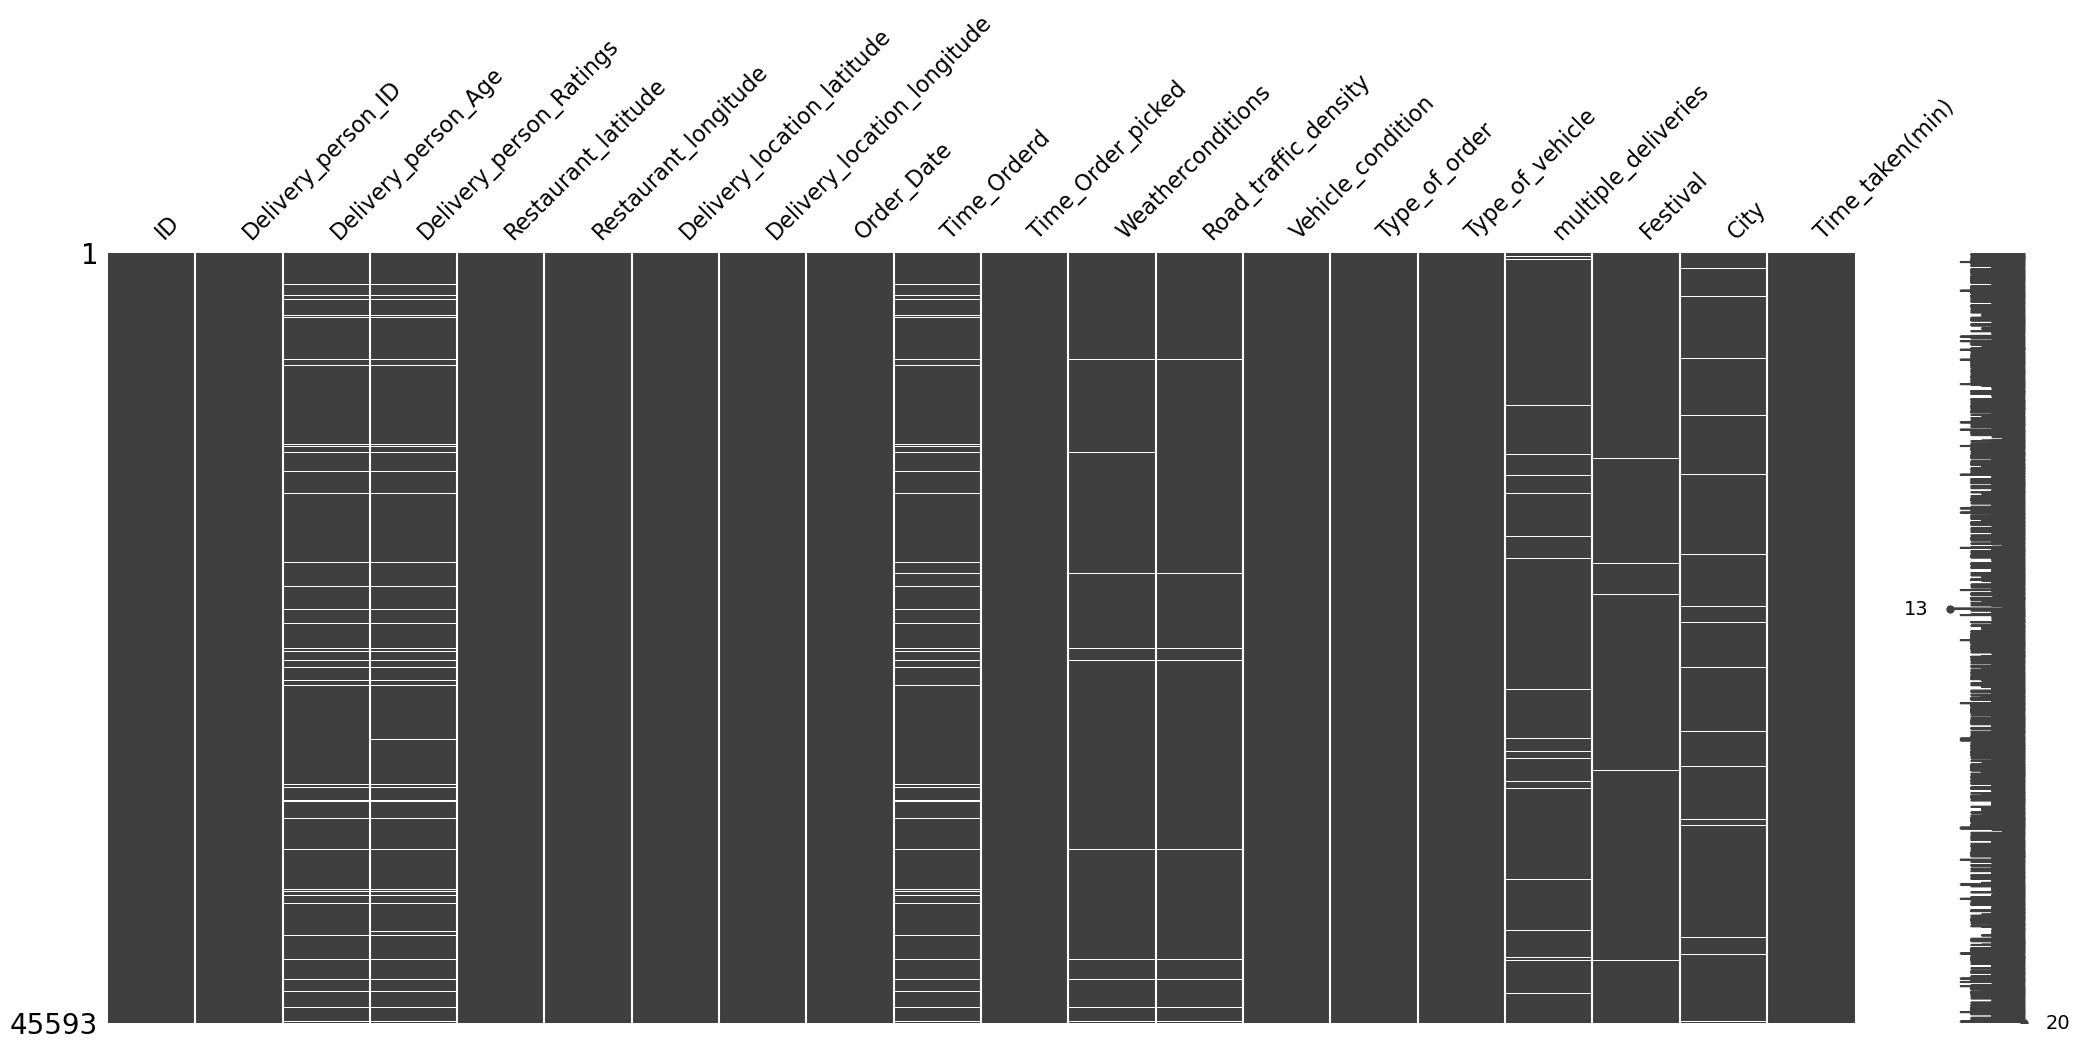

In [446]:
#we will do missing values analysis
msno.matrix(missing_df)

<Axes: >

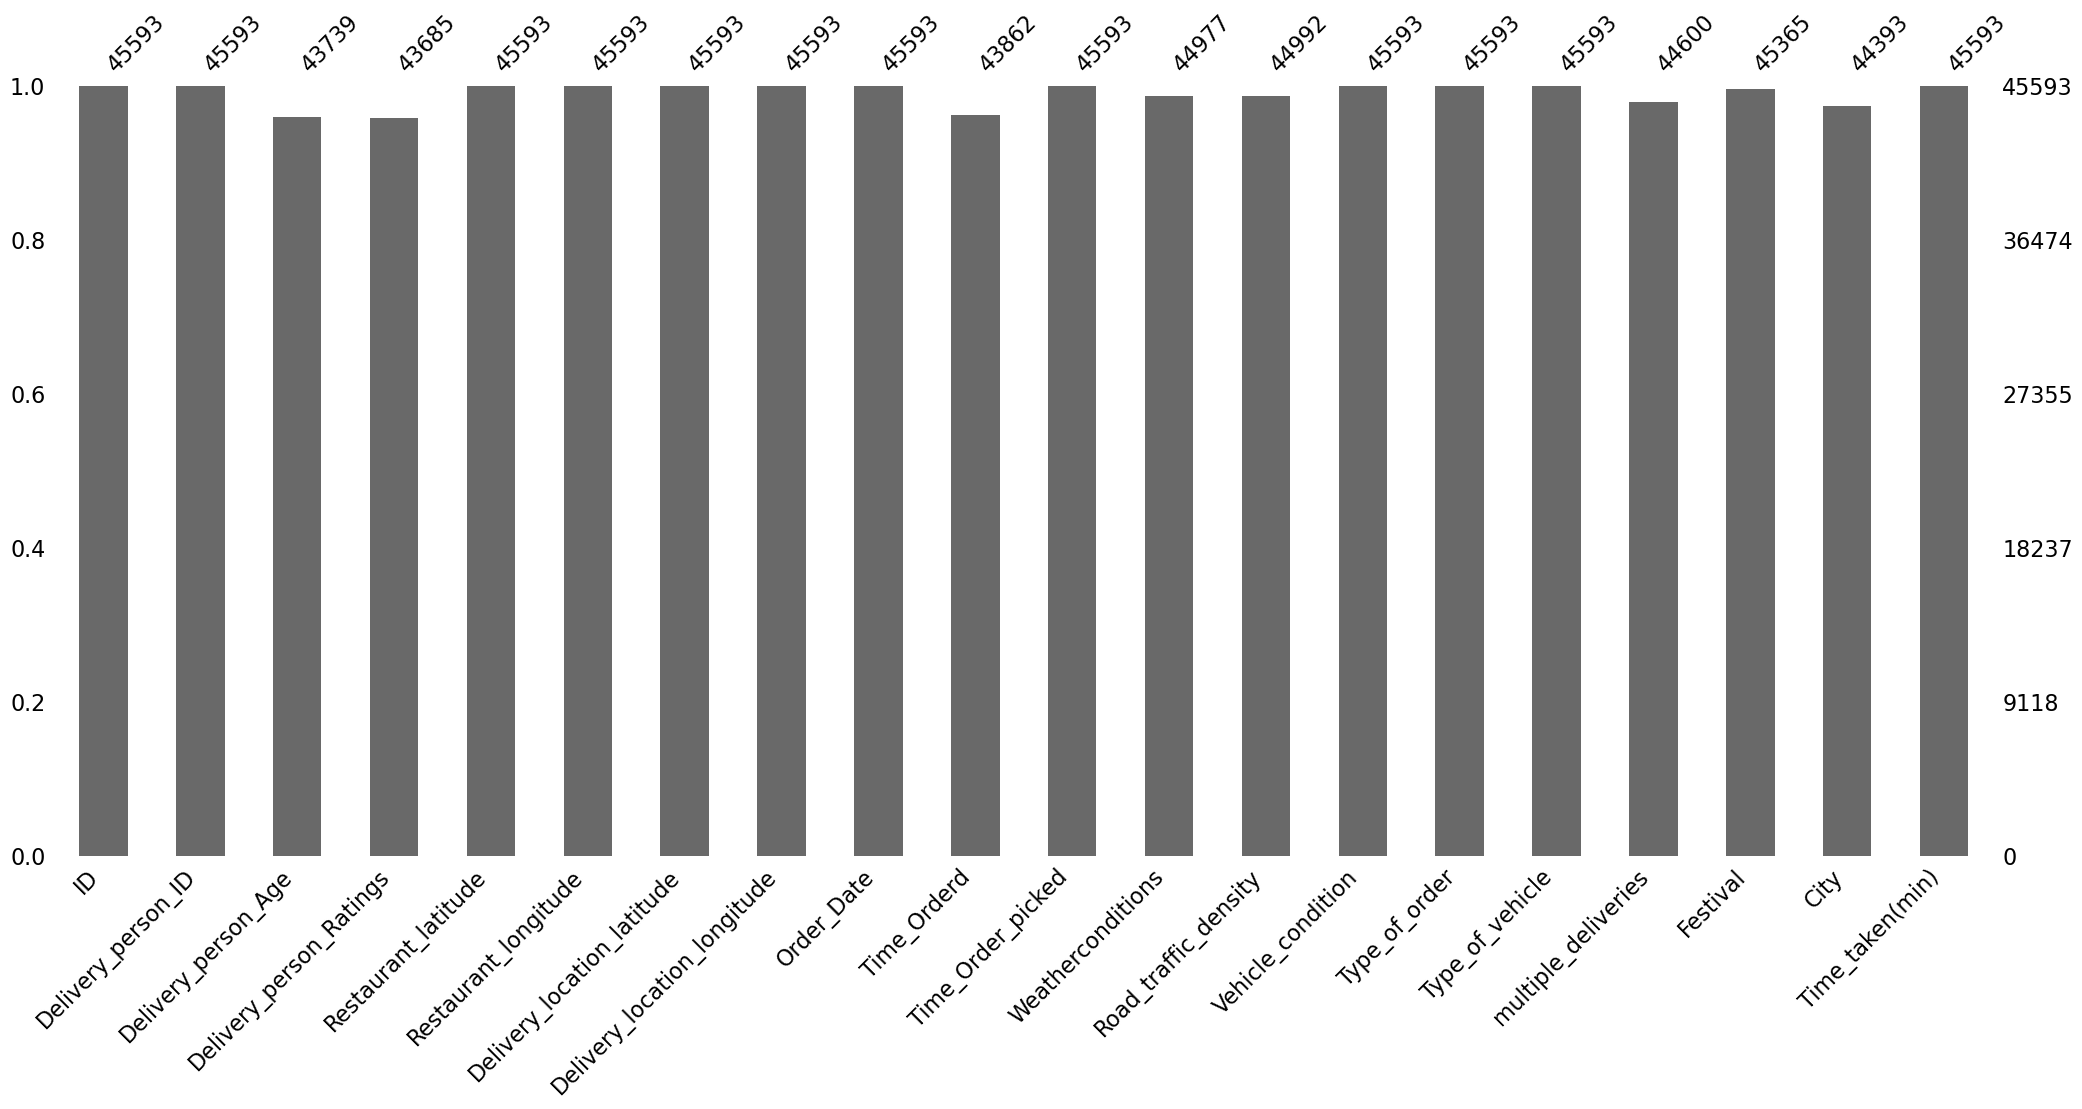

In [447]:
#Count of Missing Values
msno.bar(missing_df)

<Axes: >

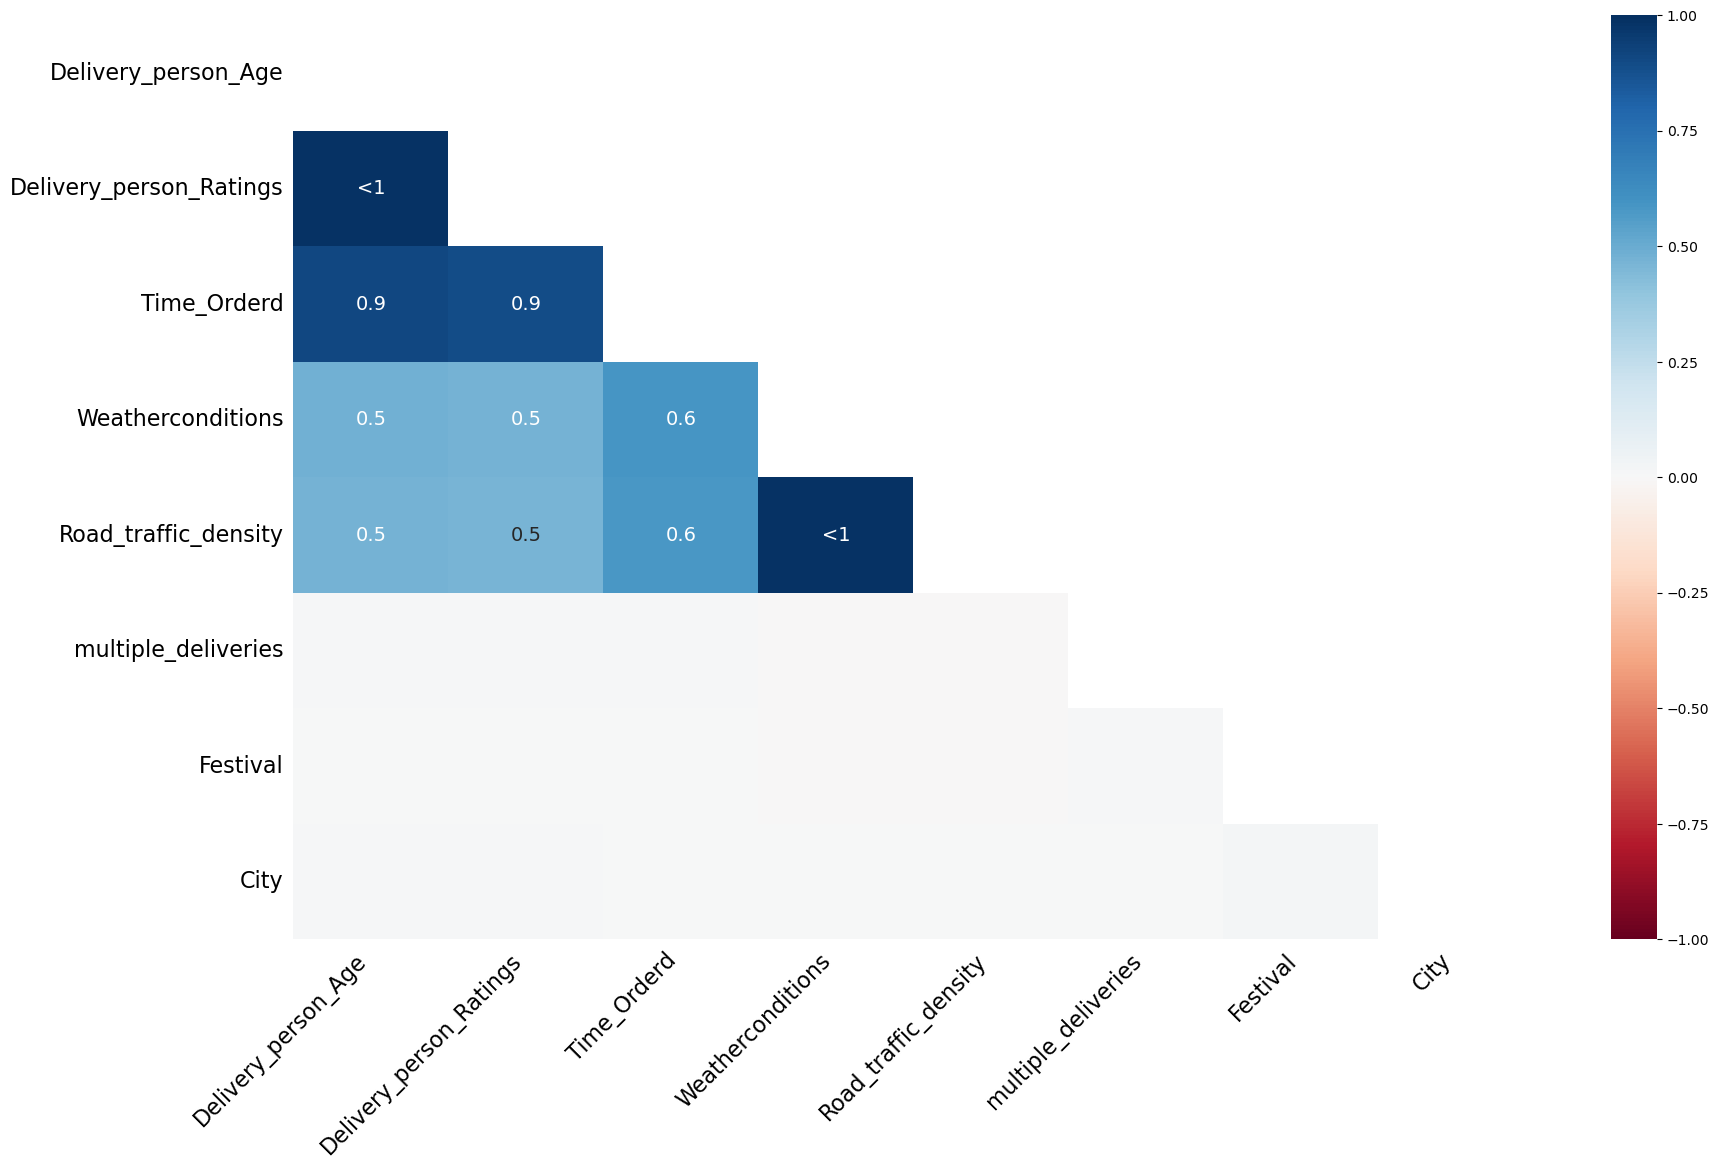

In [449]:
# missing data correlation
msno.heatmap(missing_df)



Observations

1.The delivery person columns are correlated to each other. This means that missingness in these columns is highly related which means lack of rider data.                                                            
2.The time ordered column is also related to the rider which shows that the data might be missing due to some network error where the system was unable to log rider details and time of order.                                                                                                                 
3.There is a very high correlation between weather patterns and the road traffic information. Be clear that this does not mean that the road traffic and weather columns are correlated. High corr in missingness means that if value in one column is missing, it is a high chance that it will be missing in others as well.                                               
4.Road traffic density also shows correlation to the rider as it might be provided through the phone of rider (need to investigate).

<Axes: >

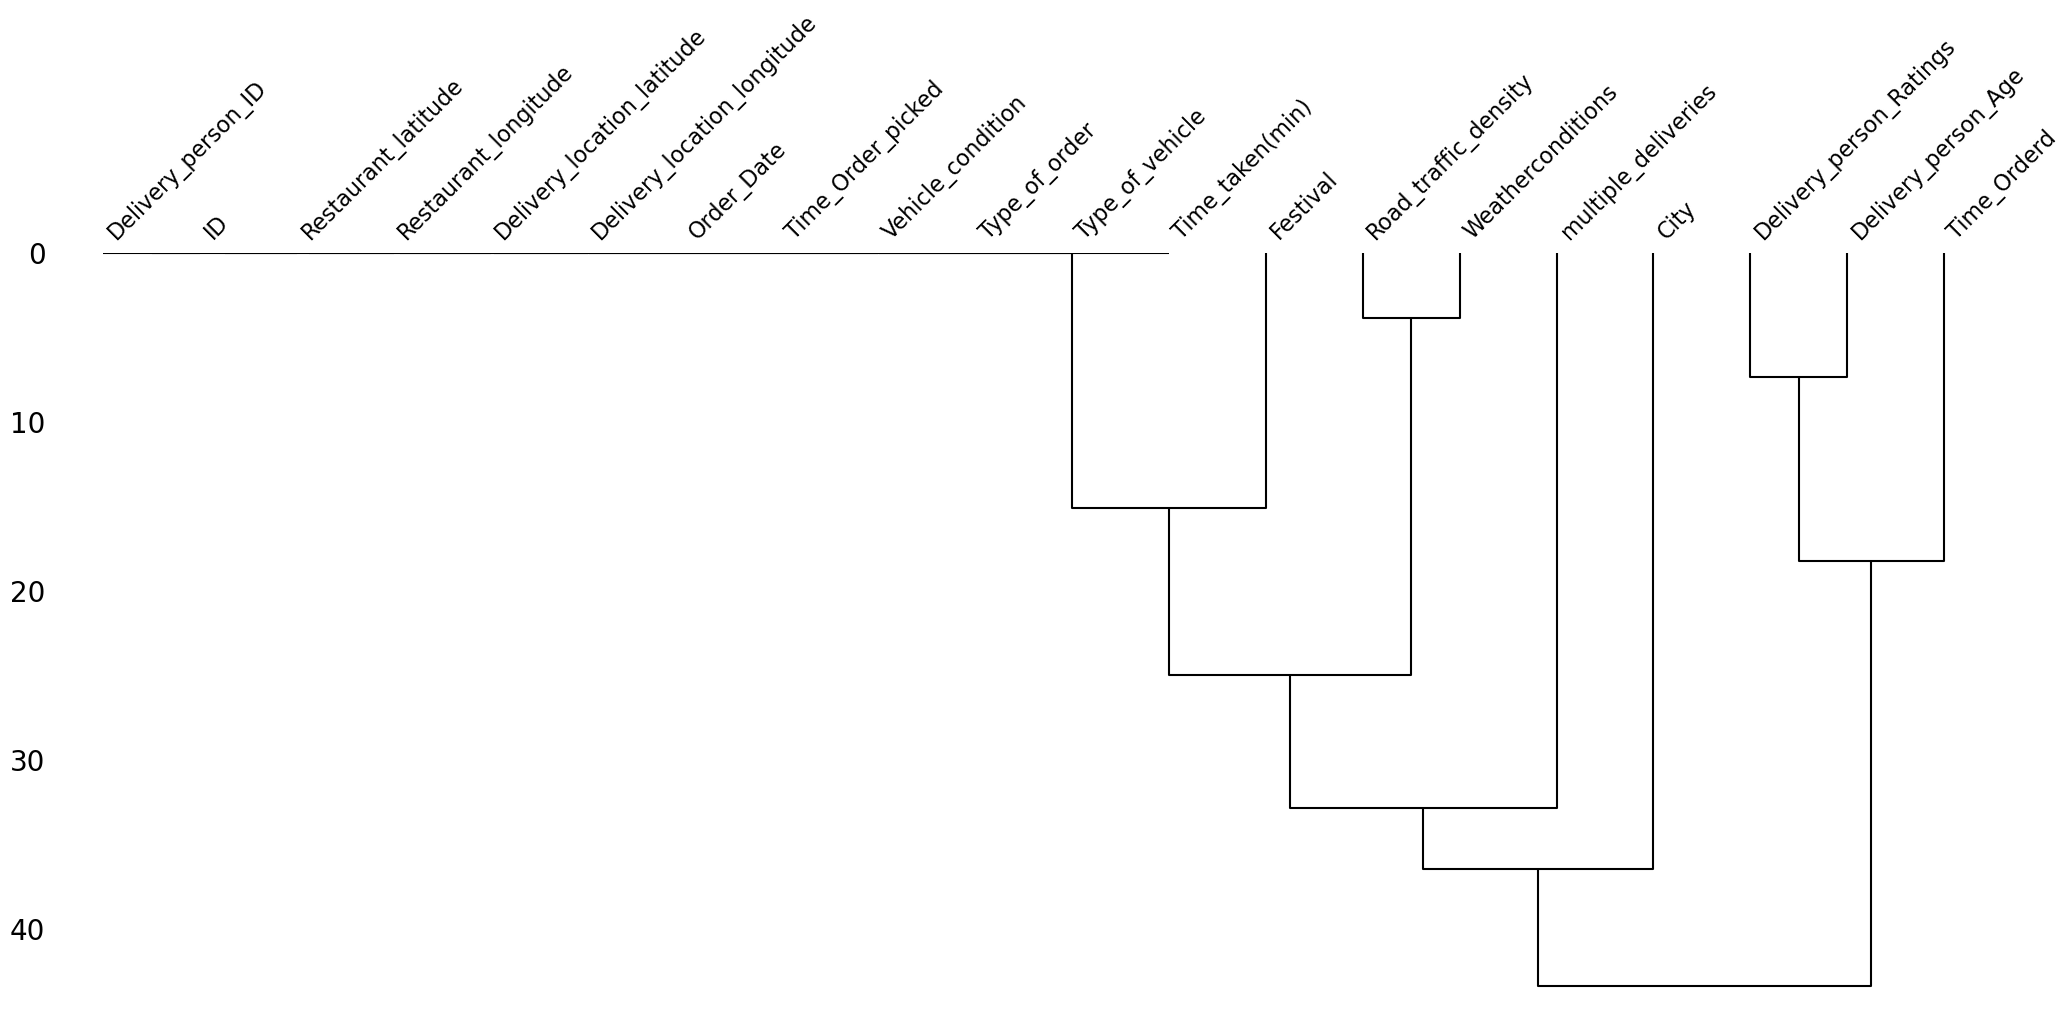

In [451]:
# dendrogram of missingness

msno.dendrogram(missing_df)

Data cleaning
-

In [456]:
#1  rename the col
def change_column_names(data: pd.DataFrame):
    return (
        data.rename(str.lower,axis=1)
        .rename({
            "delivery_person_id" : "rider_id",
            "delivery_person_age": "age",
            "delivery_person_ratings": "ratings",
            "delivery_location_latitude": "delivery_latitude",
            "delivery_location_longitude": "delivery_longitude",
            "time_orderd": "order_time",
            "time_order_picked": "order_picked_time",
            "weatherconditions": "weather",
            "road_traffic_density": "traffic",
            "city": "city_type",
            "time_taken(min)": "time_taken"},axis=1)
    )
df=change_column_names(df)

In [458]:
df.head()

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


Column Wise Cleaning
-
ID
-

Rider Id
-

In [294]:
df['rider_id'].str.split("RES").str.get(0).rename("City_Name")

0          INDO
1          BANG
2          BANG
3         COIMB
4          CHEN
          ...  
45588       JAP
45589       AGR
45590      CHEN
45591     COIMB
45592    RANCHI
Name: City_Name, Length: 45593, dtype: object

Age
-

In [296]:
df['age'].astype(float).describe()

count    43739.000000
mean        29.567137
std          5.815155
min         15.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         50.000000
Name: age, dtype: float64

In [300]:
minors_data = df.loc[df['age'].astype('float') < 18]
minors_data

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
2387,0x564,JAPRES15DEL03,15,1,-26.891191,75.802083,26.981191,75.892083,12-03-2022,NaN,17:20:00,conditions NaN,NaN,3,Meal,motorcycle,0,No,Urban,(min) 15
2905,0xcd0,INDORES010DEL03,15,1,22.750040,75.902847,22.810040,75.962847,03-04-2022,NaN,20:30:00,conditions NaN,NaN,3,Snack,scooter,1,No,Metropolitian,(min) 29
2951,0x91a,SURRES17DEL03,15,1,21.149569,72.772697,21.209569,72.832697,21-03-2022,NaN,22:10:00,conditions NaN,NaN,3,Buffet,bicycle,1,No,Metropolitian,(min) 20
5902,0x474,CHENRES15DEL03,15,1,13.026286,80.275235,13.056286,80.305235,11-03-2022,NaN,20:50:00,conditions NaN,NaN,3,Drinks,bicycle,1,No,Metropolitian,(min) 25
9156,0x73f,BANGRES05DEL01,15,1,12.970324,77.645748,13.080324,77.755748,25-03-2022,NaN,23:25:00,conditions NaN,NaN,3,Buffet,motorcycle,2,No,Metropolitian,(min) 34
10900,0x1b49,MUMRES14DEL02,15,1,19.181300,72.836191,19.231300,72.886191,30-03-2022,NaN,20:55:00,conditions NaN,NaN,3,Buffet,motorcycle,1,No,Metropolitian,(min) 39
11125,0x40b,SURRES12DEL01,15,1,-21.183434,-72.814492,21.193434,72.824492,05-03-2022,NaN,11:30:00,conditions NaN,NaN,3,Meal,scooter,1,No,Urban,(min) 27
12093,0x523,INDORES03DEL02,15,1,22.751857,75.866699,22.801857,75.916699,24-03-2022,NaN,21:15:00,conditions NaN,NaN,3,Buffet,bicycle,0,No,Metropolitian,(min) 28
15124,0x18b0,RANCHIRES02DEL01,15,1,0.000000,0.000000,0.070000,0.070000,16-03-2022,NaN,23:55:00,conditions NaN,NaN,3,Meal,bicycle,1,No,Metropolitian,(min) 21
15927,0x550,CHENRES08DEL02,15,1,13.022394,80.242439,13.072394,80.292439,11-03-2022,NaN,18:10:00,conditions NaN,NaN,3,Snack,bicycle,0,No,Metropolitian,(min) 17


Observations:

The star ratings of all the riders is 1.                        
The vehicle condition of these riders is very bad.                     
No weather and traffic conditions available.                       
Age of all these riders is 15 which is below the permissable age to drive a vehicle.                  
Latitude and Longitude values in negative which is not possible. India is situated above the equator so all latitudes should be positive and east of meridian line so longitudes are positive as well.    
      
Seems like removing this data for now makes more sense then fixing it because a lot of data is missing

In [305]:
minor_index = minors_data.index.tolist()

len(minor_index)

38

since there are only 38 row , we will drop this minor_index


Rating
-

In [310]:
df['ratings'].astype(float).describe()

count    43685.000000
mean         4.633780
std          0.334716
min          1.000000
25%          4.500000
50%          4.700000
75%          4.900000
max          6.000000
Name: ratings, dtype: float64

In [312]:
six_star_data = df.loc[df['ratings'] == "6"]

len(six_star_data)

53

In [314]:
six_star_data

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
3586,0x46d,BANGRES05DEL01,50,6,-12.970324,-77.645748,13.010324,77.685748,13-03-2022,NaN,12:30:00,conditions NaN,NaN,3,Meal,electric_scooter,0,No,Urban,(min) 25
4714,0x493,HYDRES17DEL01,50,6,-17.451976,-78.385883,17.561976,78.495883,04-04-2022,NaN,23:20:00,conditions NaN,NaN,3,Snack,bicycle,0,No,Metropolitian,(min) 27
5169,0x4f2,JAPRES08DEL01,50,6,-26.910262,-75.783013,27.020262,75.893013,18-03-2022,NaN,18:50:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Metropolitian,(min) 20
5362,0x430,BANGRES19DEL01,50,6,12.914264,77.678400,13.024264,77.788400,06-04-2022,NaN,20:55:00,conditions NaN,NaN,3,Meal,electric_scooter,1,No,Metropolitian,(min) 18
5651,0xbef1,AGRRES13DEL02,50,6,-27.159795,-78.042990,27.209795,78.092990,13-02-2022,NaN,18:05:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Metropolitian,(min) 20
6394,0x427,JAPRES06DEL02,50,6,26.911927,75.797282,27.041927,75.927282,02-04-2022,NaN,22:10:00,conditions NaN,NaN,3,Meal,electric_scooter,0,No,Urban,(min) 20
7031,0x3eb,MYSRES15DEL02,50,6,-12.352058,-76.606650,12.372058,76.626650,15-03-2022,NaN,10:00:00,conditions NaN,NaN,3,Buffet,scooter,1,No,Metropolitian,(min) 14
7681,0xd42,VADRES09DEL01,50,6,0.000000,0.000000,0.010000,0.010000,21-03-2022,NaN,08:35:00,conditions NaN,NaN,3,Meal,bicycle,1,No,Metropolitian,(min) 22
9499,0x3f0,BANGRES010DEL01,50,6,12.933298,77.614293,13.003298,77.684293,12-03-2022,NaN,18:25:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Urban,(min) 17
9535,0x3ef,RANCHIRES13DEL01,50,6,-23.374989,-85.335486,23.444989,85.405486,20-03-2022,NaN,17:55:00,conditions NaN,NaN,3,Snack,bicycle,1,No,Metropolitian,(min) 32


Data removal seems logical at this stage.

location
-

In [319]:
location_columns = df.columns[4:8].tolist()

location_columns


['restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude']

In [321]:
location_subset = df.loc[:,location_columns]
location_subset

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
0,22.745049,75.892471,22.765049,75.912471
1,12.913041,77.683237,13.043041,77.813237
2,12.914264,77.678400,12.924264,77.688400
3,11.003669,76.976494,11.053669,77.026494
4,12.972793,80.249982,13.012793,80.289982
...,...,...,...,...
45588,26.902328,75.794257,26.912328,75.804257
45589,0.000000,0.000000,0.070000,0.070000
45590,13.022394,80.242439,13.052394,80.272439
45591,11.001753,76.986241,11.041753,77.026241


In [322]:
location_subset.describe()

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702
std,8.185109,22.883647,7.335122,21.118812
min,-30.905562,-88.366217,0.010000,0.010000
25%,12.933284,73.170000,12.988453,73.280000
50%,18.546947,75.898497,18.633934,76.002574
75%,22.728163,78.044095,22.785049,78.107044
max,30.914057,88.433452,31.054057,88.563452


In [325]:
# set the lower bound limits for the lat and long

lower_bound_lat = 6.44
lower_bound_long = 68.70
     

# rows of data where latitude and longitude values are below the bounds

df.loc[
    (df['restaurant_latitude'] < lower_bound_lat) |
    (df['restaurant_longitude'] < lower_bound_long) |
    (df['delivery_latitude'] < lower_bound_lat) |
    (df['delivery_longitude'] < lower_bound_long)
].sample(50)

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
36284,0x2e3d,VADRES15DEL02,27,4.7,0.000000,0.000000,0.080000,0.080000,27-03-2022,19:45:00,19:50:00,conditions Fog,Jam,1,Buffet,motorcycle,1,No,Metropolitian,(min) 33
42286,0xd565,BHPRES07DEL03,21,5,0.000000,0.000000,0.060000,0.060000,17-02-2022,21:45:00,21:55:00,conditions Stormy,Jam,2,Meal,electric_scooter,1,NaN,Metropolitian,(min) 12
21721,0x85a8,RANCHIRES02DEL02,26,4.6,0.000000,0.000000,0.130000,0.130000,29-03-2022,22:25:00,22:30:00,conditions Windy,Low,0,Buffet,motorcycle,1,No,Metropolitian,(min) 24
36414,0x7337,VADRES02DEL02,30,4.6,0.000000,0.000000,0.080000,0.080000,08-03-2022,21:45:00,22:00:00,conditions Sandstorms,Jam,2,Snack,electric_scooter,0,No,Metropolitian,(min) 28
24181,0x75ce,VADRES18DEL02,38,4.7,0.000000,0.000000,0.050000,0.050000,03-03-2022,21:50:00,22:05:00,conditions Windy,Jam,0,Buffet,motorcycle,0,No,Metropolitian,(min) 33
41613,0xc078,KOLRES010DEL03,30,4.7,-22.538999,88.322337,22.598999,88.382337,17-02-2022,23:00:00,23:05:00,conditions Windy,Low,2,Drinks,scooter,0,No,Metropolitian,(min) 25
8629,0x7ecd,VADRES17DEL03,37,4.8,0.000000,0.000000,0.030000,0.030000,21-03-2022,18:00:00,18:15:00,conditions Sandstorms,Medium,2,Drinks,scooter,1,No,Metropolitian,(min) 26
9595,0xdb1c,AGRRES19DEL02,31,4.5,0.000000,0.000000,0.020000,0.020000,11-02-2022,08:40:00,08:55:00,conditions Fog,Low,0,Drinks,motorcycle,1,No,Metropolitian,(min) 24
5794,0xadbb,VADRES12DEL03,36,5,0.000000,0.000000,0.060000,0.060000,21-03-2022,17:25:00,17:35:00,conditions Windy,Medium,0,Snack,motorcycle,1,No,Metropolitian,(min) 26
45283,0xc86d,BHPRES12DEL02,33,4.4,0.000000,0.000000,0.050000,0.050000,13-02-2022,21:55:00,22:00:00,conditions Cloudy,Jam,1,Snack,motorcycle,1,No,Metropolitian,(min) 31


(array([1, 2, 3, 4]),
 [Text(1, 0, 'restaurant_latitude'),
  Text(2, 0, 'restaurant_longitude'),
  Text(3, 0, 'delivery_latitude'),
  Text(4, 0, 'delivery_longitude')])

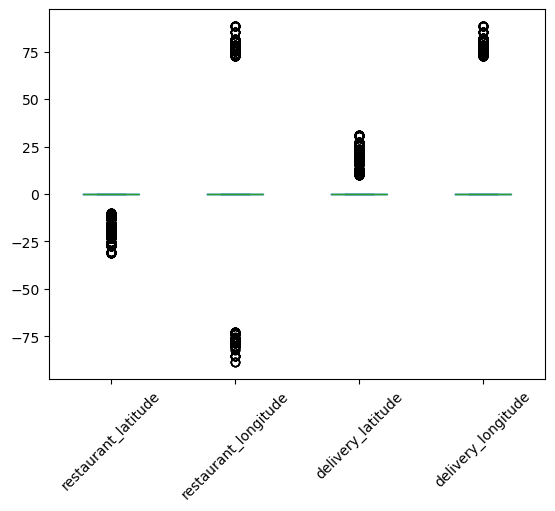

In [327]:
location_subset.loc[
    (location_subset['restaurant_latitude'] < lower_bound_lat) |
    (location_subset['restaurant_longitude'] < lower_bound_long) |
    (location_subset['delivery_latitude'] < lower_bound_lat) |
    (location_subset['delivery_longitude'] < lower_bound_long)
].plot(kind="box")

plt.xticks(rotation=45)
    

Negative Values are correct just we have to take absolute

While calculating the distances we can assign null values to these erroneous data points and then impute the values using advanced imputation techniques/

[Text(1, 0, 'restaurant_latitude'),
 Text(2, 0, 'restaurant_longitude'),
 Text(3, 0, 'delivery_latitude'),
 Text(4, 0, 'delivery_longitude')]

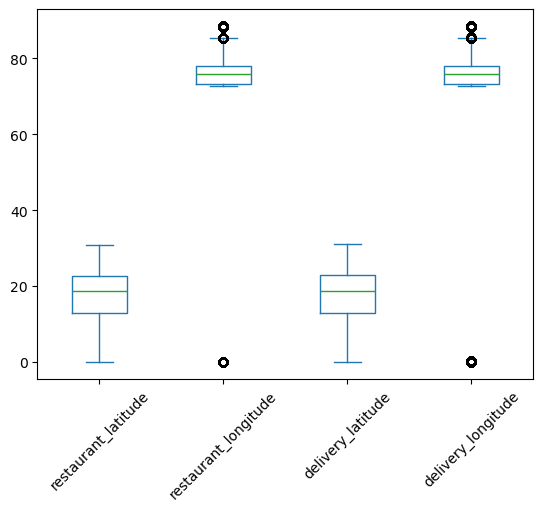

In [330]:
(
    location_subset.abs()
    .plot(kind="box")
)

ax = plt.gca()

ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [331]:
# lat long values less than 1

location_subset.abs().loc[lambda df_:
                        (df_['restaurant_latitude'] < 1) |
                        (df_['restaurant_longitude'] < 1) |
                        (df_['delivery_latitude'] < 1) |
                        (df_['delivery_longitude'] < 1)]

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
33,0.0,0.0,0.11,0.11
52,0.0,0.0,0.03,0.03
57,0.0,0.0,0.08,0.08
59,0.0,0.0,0.06,0.06
67,0.0,0.0,0.02,0.02
...,...,...,...,...
45569,0.0,0.0,0.07,0.07
45576,0.0,0.0,0.13,0.13
45577,0.0,0.0,0.09,0.09
45579,0.0,0.0,0.05,0.05


In [334]:
#All the messy lat long values are less than 1

def clean_lat_long(data: pd.DataFrame, threshold=1):     #this fun take dataframe which values are less then 1  nad covert into nan
    location_columns = location_subset.columns.tolist()

    return (
        data
        .assign(**{
            col: (
                np.where(data[col] < threshold, np.NaN, data[col].values)
            )
            for col in location_columns
        })
    )
     

In [336]:
clean_lat_long(df).isna().sum()


id                         0
rider_id                   0
age                        0
ratings                    0
restaurant_latitude     4071
restaurant_longitude    3802
delivery_latitude       3640
delivery_longitude      3640
order_date                 0
order_time                 0
order_picked_time          0
weather                    0
traffic                    0
vehicle_condition          0
type_of_order              0
type_of_vehicle            0
multiple_deliveries        0
festival                   0
city_type                  0
time_taken                 0
dtype: int64

order_date	
-

In [339]:

df['order_date'].isna().sum()

0

In [341]:
# date range

order_date = pd.to_datetime(df['order_date'],dayfirst=True)

order_date.max() - order_date.min()
     

Timedelta('54 days 00:00:00')

In [343]:
# min and maximum dates

order_date.agg(["min","max"]).set_axis(["start","end"],axis=0)

start   2022-02-11
end     2022-04-06
Name: order_date, dtype: datetime64[ns]

In [345]:
# extract day, day name, month and year

def extract_datetime_features(ser):
    date_col = pd.to_datetime(ser,dayfirst=True)

    return (
        pd.DataFrame(
            {
                "day": date_col.dt.day,
                "month": date_col.dt.month,
                "year": date_col.dt.year,
                "day_of_week": date_col.dt.day_name(),
                "is_weekend": date_col.dt.day_name().isin(["Saturday","Sunday"]).astype(int)
            }
        ))

In [347]:
extract_datetime_features(df['order_date'])

,day,month,year,day_of_week,is_weekend
0,19,3,2022,Saturday,1
1,25,3,2022,Friday,0
2,19,3,2022,Saturday,1
3,5,4,2022,Tuesday,0
4,26,3,2022,Saturday,1
...,...,...,...,...,...
45588,24,3,2022,Thursday,0
45589,16,2,2022,Wednesday,0
45590,11,3,2022,Friday,0
45591,7,3,2022,Monday,0



Order time and Order picked time
-

In [351]:
# extract hour info from data

order_time_hr = pd.to_datetime(df.replace("NaN ",np.NaN)['order_time'],format='mixed').dt.hour

order_time_hr


0        11.0
1        19.0
2         8.0
3        18.0
4        13.0
         ... 
45588    11.0
45589    19.0
45590    23.0
45591    13.0
45592    17.0
Name: order_time, Length: 45593, dtype: float64

In [353]:
def time_of_day(ser):
    time_col = pd.to_datetime(ser,format='mixed').dt.hour

    return(
        np.select(condlist=[(ser.between(6,12,inclusive='left')),
                            (ser.between(12,17,inclusive='left')),
                            (ser.between(17,20,inclusive='left')),
                            (ser.between(20,24,inclusive='left'))],
                  choicelist=["morning","afternoon","evening","night"],
                  default="after_midnight")
    )

In [355]:
time_subset = df.loc[:,["order_time","order_picked_time"]]
time_subset

,order_time,order_picked_time
0,11:30:00,11:45:00
1,19:45:00,19:50:00
2,08:30:00,08:45:00
3,18:00:00,18:10:00
4,13:30:00,13:45:00
...,...,...
45588,11:35:00,11:45:00
45589,19:55:00,20:10:00
45590,23:50:00,00:05:00
45591,13:35:00,13:40:00


In [357]:
# calculate the pickup time

(
    time_subset
    .assign(**{
        col: pd.to_datetime(time_subset[col].replace("NaN ",np.NaN).dropna(),format="mixed")
        for col in time_subset.columns.tolist()}
    )
    .assign(
        pickup_time = lambda x: (x['order_picked_time'] - x['order_time']).dt.seconds / 60,
        order_time_hour = lambda x: x['order_time'].dt.hour,
        order_time_of_day = lambda x: x['order_time_hour'].pipe(time_of_day)
    )
    .drop(columns=["order_time","order_picked_time"])
)

,pickup_time,order_time_hour,order_time_of_day
0,15.0,11.0,morning
1,5.0,19.0,evening
2,15.0,8.0,morning
3,10.0,18.0,evening
4,15.0,13.0,afternoon
...,...,...,...
45588,10.0,11.0,morning
45589,15.0,19.0,evening
45590,15.0,23.0,night
45591,5.0,13.0,afternoon


weather	traffic
-

In [361]:
# value counts

df['weather'].value_counts()

weather
conditions Fog           7654
conditions Stormy        7586
conditions Cloudy        7536
conditions Sandstorms    7495
conditions Windy         7422
conditions Sunny         7284
conditions NaN            616
Name: count, dtype: int64

In [363]:
# remove conditions from values

(
    df['weather']
    .str.replace("conditions ","")
    .unique()
)

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy', 'NaN'],
      dtype=object)

we will remove nan 

traffic
-

In [368]:
# value counts

df['traffic'].value_counts()

traffic
Low        15477
Jam        14143
Medium     10947
High        4425
NaN          601
Name: count, dtype: int64

In [370]:
(
    df['traffic']
    .replace("NaN ",np.NaN)
    .str.rstrip()
    .str.lower()
    .unique()
)

array(['high', 'jam', 'low', 'medium', nan], dtype=object)

Vehicle Condition
-

In [373]:
# unique values in column

np.sort(df['vehicle_condition'].unique())
     

array([0, 1, 2, 3], dtype=int64)

In [375]:
#no cleaning

type_of_order	
-

In [378]:
# value counts

df['type_of_order'].value_counts()

type_of_order
Snack      11533
Meal       11458
Drinks     11322
Buffet     11280
Name: count, dtype: int64

In [380]:

(
    df['type_of_order']
    .str.rstrip()
    .str.lower()
    .unique()
)

array(['snack', 'drinks', 'buffet', 'meal'], dtype=object)

type_of_vehicle
-

In [384]:
df['type_of_vehicle'].value_counts()

type_of_vehicle
motorcycle           26435
scooter              15276
electric_scooter      3814
bicycle                 68
Name: count, dtype: int64

In [386]:
(
    df['type_of_vehicle']
    .str.rstrip()
    .str.lower()
    .unique()
)

array(['motorcycle', 'scooter', 'electric_scooter', 'bicycle'],
      dtype=object)

multiple_deliveries
-

In [389]:

# unique values in column

df['multiple_deliveries'].unique()

array(['0', '1', '3', 'NaN ', '2'], dtype=object)

In [391]:
# make the column as integer

(
    df['multiple_deliveries']
    .replace("NaN ",np.NaN)
    .astype(float)
    .unique()
)

array([ 0.,  1.,  3., nan,  2.])

festival	
-

In [394]:
df['festival'].unique()

array(['No ', 'Yes ', 'NaN '], dtype=object)

In [396]:
(
    df['festival']
    .replace("NaN ",np.NaN)
    .str.rstrip()
    .str.lower()
    .unique()
)

array(['no', 'yes', nan], dtype=object)

city_type
-

In [400]:
# unique values in city type

df['city_type'].unique()

array(['Urban ', 'Metropolitian ', 'Semi-Urban ', 'NaN '], dtype=object)

In [402]:
(
    df['city_type']
    .replace("NaN ",np.NaN)
    .str.rstrip()
    .str.lower()
    .unique()
)
  

array(['urban', 'metropolitian', 'semi-urban', nan], dtype=object)

time_taken
-

In [405]:
(
    df['time_taken']
    .str.replace("(min) ","")
    .astype(int)
)

0        24
1        33
2        26
3        21
4        30
         ..
45588    32
45589    36
45590    16
45591    26
45592    36
Name: time_taken, Length: 45593, dtype: int32

perform cleaning in one fun
-

In [460]:
df.columns

Index(['id', 'rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'order_time', 'order_picked_time', 'weather', 'traffic',
       'vehicle_condition', 'type_of_order', 'type_of_vehicle',
       'multiple_deliveries', 'festival', 'city_type', 'time_taken'],
      dtype='object')

In [500]:

def data_cleaning(data: pd.DataFrame):
    return (
        data
        .drop(columns=["id"], errors="ignore")  # ✅ won't break if 'id' column is missing
        .drop(index=minor_index, errors="ignore")  # ✅ ignore if indexes don't exist
        .drop(index=six_star_data, errors="ignore")  # ✅ variable name kept consistent
        .replace("NaN ", np.NaN)
        .assign(
            # city column out of rider id
            city_name=lambda x: x['rider_id'].str.split("RES").str.get(0),
            # convert age to float
            age=lambda x: x['age'].astype(float),
            # convert ratings to float
            ratings=lambda x: x['ratings'].astype(float),
            # absolute values for location based columns
            restaurant_latitude=lambda x: x['restaurant_latitude'].abs(),
            restaurant_longitude=lambda x: x['restaurant_longitude'].abs(),
            delivery_latitude=lambda x: x['delivery_latitude'].abs(),
            delivery_longitude=lambda x: x['delivery_longitude'].abs(),
            # order date to datetime and feature extraction
            order_date=lambda x: pd.to_datetime(x['order_date'], dayfirst=True, errors='coerce'),
            order_day=lambda x: x['order_date'].dt.day,
            order_month=lambda x: x['order_date'].dt.month,
            order_day_of_week=lambda x: x['order_date'].dt.day_name().str.lower(),
            is_weekend=lambda x: x['order_date'].dt.day_name().isin(["Saturday", "Sunday"]).astype(int),
            # time based columns
            order_time=lambda x: pd.to_datetime(x['order_time'], format='mixed', errors='coerce'),
            order_picked_time=lambda x: pd.to_datetime(x['order_picked_time'], format='mixed', errors='coerce'),
            # time taken to pick order
            pickup_time_minutes=lambda x: (
                (x['order_picked_time'] - x['order_time']).dt.seconds / 60
            ),
            # hour in which order was placed
            order_time_hour=lambda x: x['order_time'].dt.hour,
            # time of the day when order was placed
            order_time_of_day=lambda x: x['order_time_hour'].pipe(time_of_day),
            # categorical columns
            weather=lambda x: (
                x['weather']
                .str.replace("conditions ", "")
                .str.lower()
                .replace("nan", np.NaN)
            ),
            traffic=lambda x: x["traffic"].str.rstrip().str.lower(),
            type_of_order=lambda x: x['type_of_order'].str.rstrip().str.lower(),
            type_of_vehicle=lambda x: x['type_of_vehicle'].str.rstrip().str.lower(),
            festival=lambda x: x['festival'].str.rstrip().str.lower(),
            city_type=lambda x: x['city_type'].str.rstrip().str.lower(),
            # multiple deliveries column
            multiple_deliveries=lambda x: x['multiple_deliveries'].astype(float),
            # target column modifications
            time_taken=lambda x: x['time_taken'].str.replace("(min) ", "").astype(int)
        )
        .drop(columns=["order_time", "order_picked_time"], errors="ignore")  # ✅ no crash if missing
    )


In [502]:
df

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [504]:
data_cleaning(df)

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,city_type,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,urban,24,INDO,19,3,saturday,1,15.0,11.0,morning
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,metropolitian,33,BANG,25,3,friday,0,5.0,19.0,evening
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,urban,26,BANG,19,3,saturday,1,15.0,8.0,morning
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,metropolitian,21,COIMB,5,4,tuesday,0,10.0,18.0,evening
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,metropolitian,30,CHEN,26,3,saturday,1,15.0,13.0,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,windy,high,...,metropolitian,32,JAP,24,3,thursday,0,10.0,11.0,morning
45589,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,windy,jam,...,metropolitian,36,AGR,16,2,wednesday,0,15.0,19.0,evening
45590,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,cloudy,low,...,metropolitian,16,CHEN,11,3,friday,0,15.0,23.0,night
45591,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,cloudy,high,...,metropolitian,26,COIMB,7,3,monday,0,5.0,13.0,afternoon


In [506]:
df

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [508]:
def calculate_haversine_distance(df):
    location_columns = location_subset.columns.tolist()
    lat1 = df[location_columns[0]]
    lon1 = df[location_columns[1]]
    lat2 = df[location_columns[2]]
    lon2 = df[location_columns[3]]

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(
        dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    distance = 6371 * c

    return (
        df.assign(
            distance = distance)
    )

In [510]:
# add more data cleaning steps

cleaned_data = (
                df.pipe(data_cleaning)
                .pipe(clean_lat_long)
                .pipe(calculate_haversine_distance)
                )

cleaned_data

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,24,INDO,19,3,saturday,1,15.0,11.0,morning,3.025149
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,33,BANG,25,3,friday,0,5.0,19.0,evening,20.183530
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,26,BANG,19,3,saturday,1,15.0,8.0,morning,1.552758
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,21,COIMB,5,4,tuesday,0,10.0,18.0,evening,7.790401
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,30,CHEN,26,3,saturday,1,15.0,13.0,afternoon,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,windy,high,...,32,JAP,24,3,thursday,0,10.0,11.0,morning,1.489846
45589,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,windy,jam,...,36,AGR,16,2,wednesday,0,15.0,19.0,evening,NaN
45590,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,cloudy,low,...,16,CHEN,11,3,friday,0,15.0,23.0,night,4.657195
45591,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,cloudy,high,...,26,COIMB,7,3,monday,0,5.0,13.0,afternoon,6.232393


<Axes: >

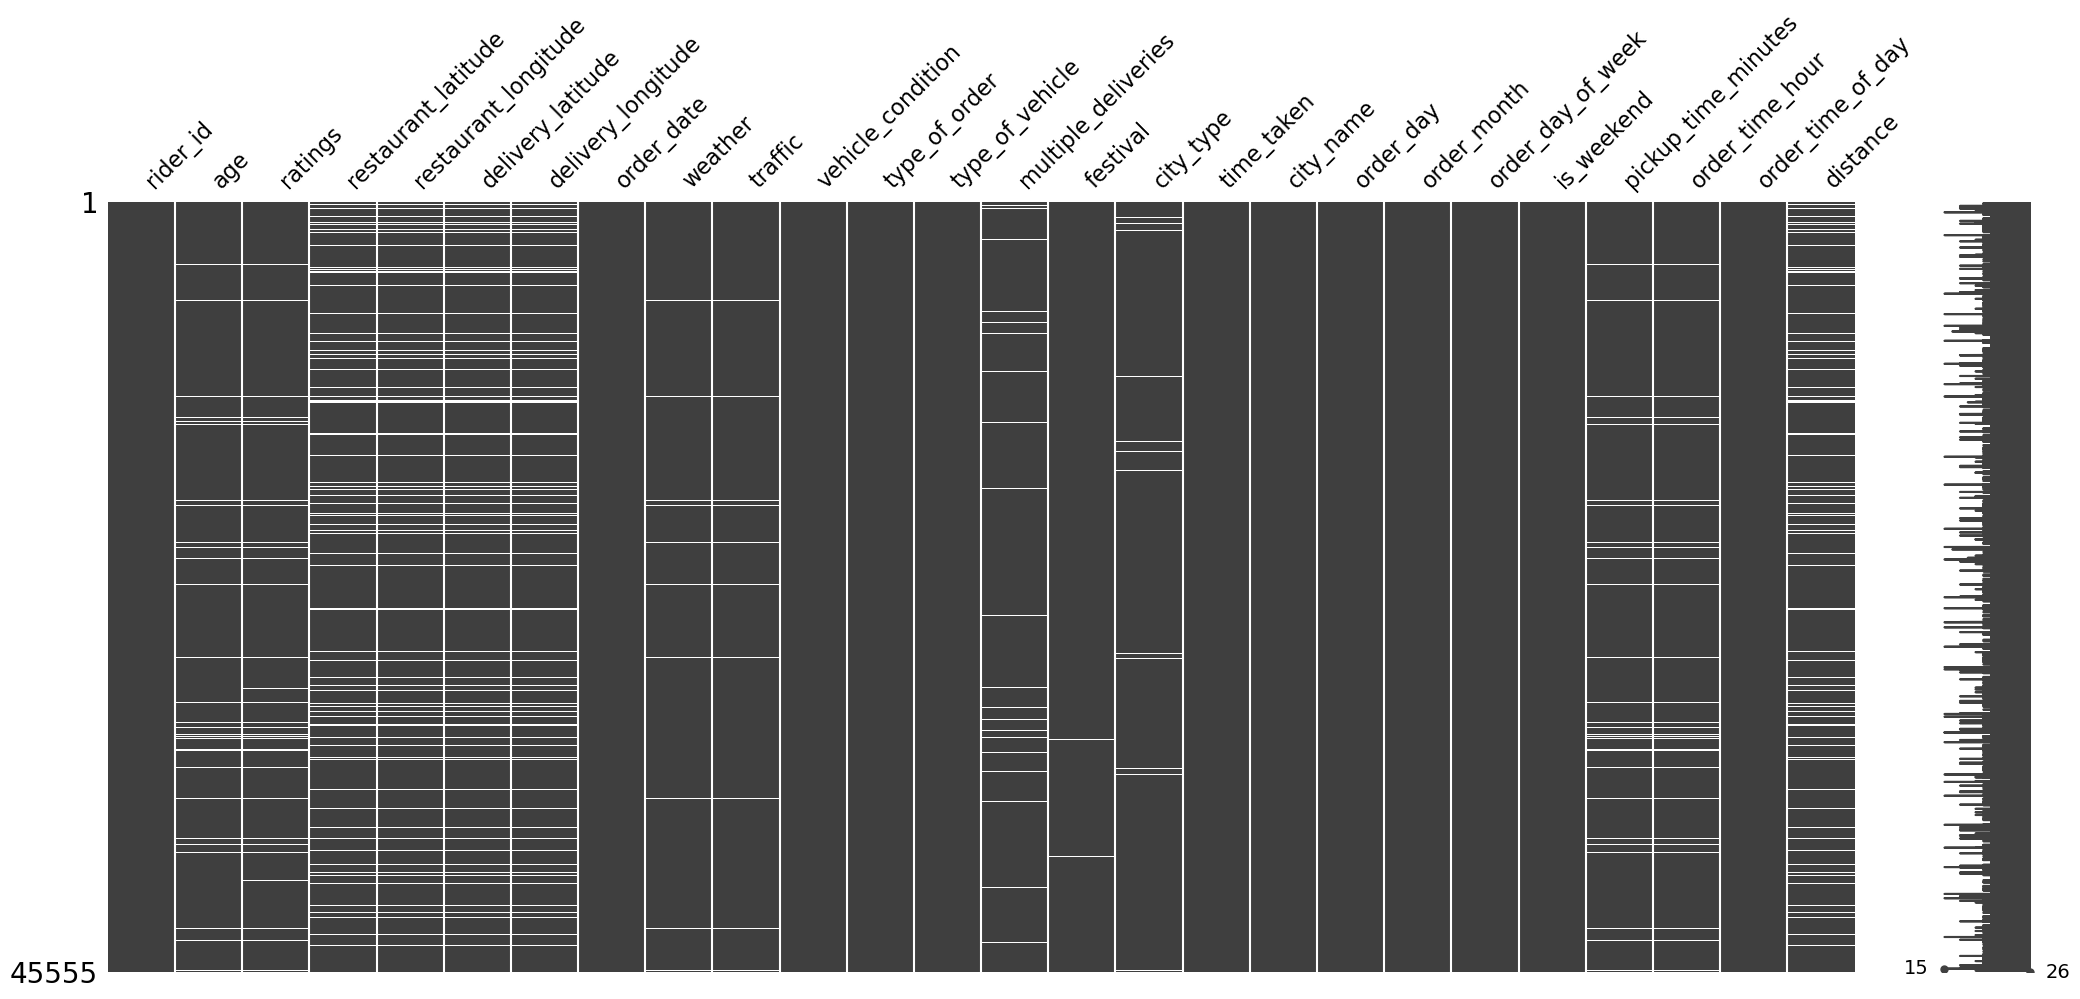

In [512]:

msno.matrix(cleaned_data)

Save Cleaned Data
-




In [515]:
cleaned_data.to_csv("cleaned_data.csv",index=False)

In [5]:

# load the cleaned data
import pandas as pd

cleaned_data_load = pd.read_csv("cleaned_data.csv")

In [7]:
cleaned_data_load.dtypes

rider_id                 object
age                     float64
ratings                 float64
restaurant_latitude     float64
restaurant_longitude    float64
delivery_latitude       float64
delivery_longitude      float64
order_date               object
weather                  object
traffic                  object
vehicle_condition         int64
type_of_order            object
type_of_vehicle          object
multiple_deliveries     float64
festival                 object
city_type                object
time_taken                int64
city_name                object
order_day                 int64
order_month               int64
order_day_of_week        object
is_weekend                int64
pickup_time_minutes     float64
order_time_hour         float64
order_time_of_day        object
distance                float64
dtype: object


After doing this ,i have made onfile named data_clean_utils.py which contains all function of data cleaning
-

In [13]:
cleaned_data_load['ratings'].describe()

count    43647.000000
mean         4.636944
std          0.317217
min          2.500000
25%          4.500000
50%          4.700000
75%          4.900000
max          6.000000
Name: ratings, dtype: float64